In [74]:
import pandas as pd
import json
import matplotlib.pyplot as plt

from vlnce_baselines import utils


eval_dir = "data/checkpoints/full/full_dt_batch_8_d128/evals"

def read_results_per_split(result_path_dict, split=None):
    list_of_poor_iterations = {}
    for data_split in result_path_dict.keys():
        if split is not None and data_split != split:
            continue
        values = {}
        sorted_keys = sorted(result_path_dict[data_split].keys())
        for iteration in sorted_keys:
            with open(result_path_dict[data_split][iteration], 'r') as f:
                datapoint = json.load(f)
                values[iteration] = datapoint
        frame = pd.DataFrame.from_dict(values, columns=list(datapoint.keys()), orient="index")
        poor_iterations = [ k for k in sorted_keys]
        list_of_poor_iterations[data_split] = poor_iterations, frame
    return list_of_poor_iterations


def read_poor_results_per_split(result_path_dict, keep_n_best = 5, split=None, criteria="spl"):
    list_of_poor_iterations = read_results_per_split(result_path_dict, split)
    for data_split in list_of_poor_iterations.keys():
        if split is not None and data_split != split:
            continue
        _ , frame = list_of_poor_iterations[data_split]
        bests = frame[criteria].nlargest(keep_n_best)
        poor_iterations = [ k for k in result_path_dict[data_split].keys() if k not in bests.keys() ]
        list_of_poor_iterations[data_split] = poor_iterations
    return list_of_poor_iterations
split = None
t = utils.get_result_files_per_datasplit(eval_dir)
r = read_results_per_split(t, split=split)


Running several config files from: data/checkpoints/full/full_dt_batch_8_d128/evals
exp_config data/checkpoints/full/full_dt_batch_8_d128/evals/stats_ckpt.20.pth_val_seen.json
exp_config data/checkpoints/full/full_dt_batch_8_d128/evals/stats_ckpt.17.pth_val_seen_80_ep.json
exp_config data/checkpoints/full/full_dt_batch_8_d128/evals/stats_ckpt.34.pth_val_seen_80_ep.json
exp_config data/checkpoints/full/full_dt_batch_8_d128/evals/stats_ckpt.22.pth_val_seen_80_ep.json
exp_config data/checkpoints/full/full_dt_batch_8_d128/evals/stats_ckpt.33.pth_val_seen_80_ep.json
exp_config data/checkpoints/full/full_dt_batch_8_d128/evals/stats_ckpt.4.pth_val_seen_80_ep.json
exp_config data/checkpoints/full/full_dt_batch_8_d128/evals/stats_ckpt.31.pth_val_unseen.json
exp_config data/checkpoints/full/full_dt_batch_8_d128/evals/stats_ckpt.8.pth_val_seen_80_ep.json
exp_config data/checkpoints/full/full_dt_batch_8_d128/evals/stats_ckpt.15.pth_val_seen_80_ep.json
exp_config data/checkpoints/full/full_dt_batch

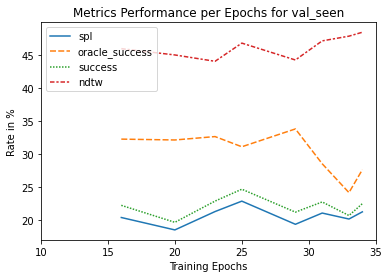

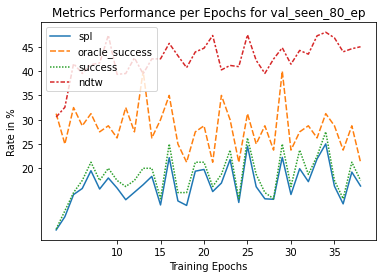

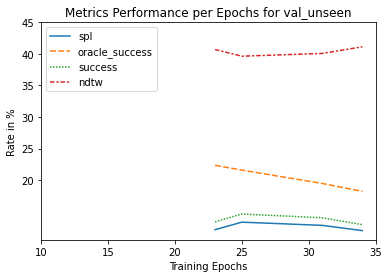

In [84]:
import seaborn as sns

def plot(frame, filter = ["spl", "oracle_success", "success", "ndtw"], xticks=[10, 15 , 20,25,30,35]):
    
    data = frame[filter]
    plt.figure() 
    graph = sns.lineplot(data=data*100)
    graph.set(xticks=xticks, yticks=[ 20, 25, 30, 35, 40, 45])
    graph.set(xlabel ="Training Epochs", ylabel = "Rate in %", title =f'Metrics Performance per Epochs for {split}')

for split in r.keys():
    frame = r[split][1]
    plot(frame)
    

